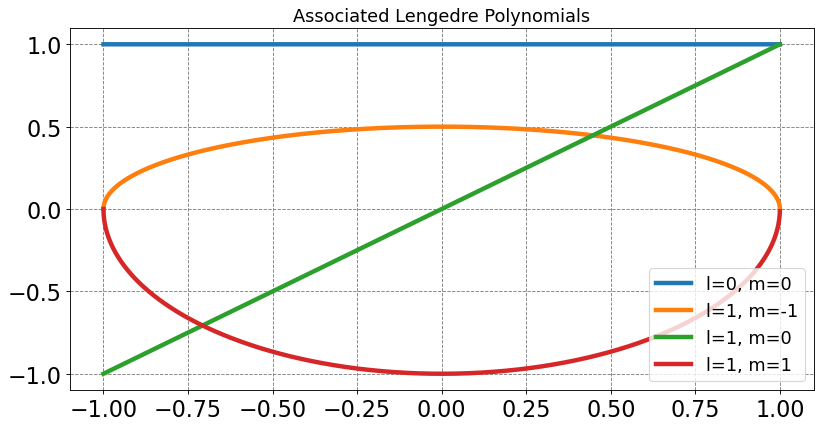

In [1]:
# plot of some of the Legendre polynomials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import lpmv
x = np.arange(-1,1,0.0001)
plt.figure(figsize=(12,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
for l in range(2):
    for m in range(-l,l+1):
        label = "l=" + str(l) + ", m=" + str(m)
        plt.plot(x,lpmv(m,l,x),lw=4,label=label)
plt.title("Associated Lengedre Polynomials",fontsize=16)
plt.legend(fontsize=16);

In [2]:
from scipy import integrate

In [3]:
def aleg(x,l,m):
    return lpmv(m,l,x)
def aleg2(x,l,m):
    return lpmv(m,l,x)**2

In [4]:
integrate.quad(aleg,-1.0,1.0,args=(1,0))[0]

7.03271174002352e-18

In [5]:
h = 6.626e-34
hbar = h/(2*np.pi)
me = 9.1093e-31 # kg
r0 = 10e-9
print(hbar**2*np.pi**2/(2*me*r0**2))
print(hbar**2*np.pi**2/(2*me*r0**2)*6.022e23/1000)

6.024595193922694e-22
0.36280112257802466
